# Лабораторная работа №3
## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей
## Выполнил Плешаков Владислав, РТ5-61Б
### Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
5. Сравните метрики качества исходной и оптимальной моделей.

Датасет: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict

In [2]:
data = pd.read_csv('data/music_genre.csv', sep=',')

## Общая информация о датасете

In [3]:
data.head(10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic


In [4]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [5]:
data.shape

(50000, 18)

In [6]:
data.isnull().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [7]:
data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [8]:
# Посмотрим на соотношение классов целевого признака
for cls in pd.unique(data['music_genre'], ):
    print(f'Класс {cls}. Процент {data[data["music_genre"] == str(cls)].shape[0]/data.shape[0] * 100}%')

Класс Electronic. Процент 10.0%
Класс Anime. Процент 10.0%
Класс Jazz. Процент 10.0%
Класс Alternative. Процент 10.0%
Класс Country. Процент 10.0%
Класс Rap. Процент 10.0%
Класс Blues. Процент 10.0%
Класс Rock. Процент 10.0%
Класс Classical. Процент 10.0%
Класс Hip-Hop. Процент 10.0%


## Предобработка данных

### Заполнение пропусков

Колонка tempo должна иметь тип float64, но из-за того что отсутствующие значения заполнили занаками вопроса, она имеет тип object. Исправим это

In [9]:
data['tempo'] = pd.to_numeric(data['tempo'], errors='coerce')  # errors='coerce' заполняет ошибки NaN
data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
obtained_date        object
valence             float64
music_genre          object
dtype: object

Заполним пропуски в колонке tempo

In [10]:
from sklearn.impute import SimpleImputer, MissingIndicator
indicator = MissingIndicator()
missing_tempo = indicator.fit_transform(data[['tempo']])

imp_tempo = SimpleImputer(strategy='median')
data[['tempo']] = imp_tempo.fit_transform(data[['tempo']])
data[missing_tempo]['tempo']

5        119.879
32       119.879
35       119.879
36       119.879
39       119.879
          ...   
49913    119.879
49959    119.879
49962    119.879
49971    119.879
49972    119.879
Name: tempo, Length: 4980, dtype: float64

Также пропуски были обнаружены в колонке duration_ms. Они были записаны как -1

In [11]:
data_dur = data[['duration_ms']].copy()
data_dur[data_dur['duration_ms'] == -1] = np.nan
data_dur.head()

,duration_ms
0,NaN
1,218293.0
2,215613.0
3,166875.0
4,222369.0


Теперь заполним эти пропуски

In [12]:
indicator = MissingIndicator()
missing_duration = indicator.fit_transform(data_dur[['duration_ms']])

imp_duration = SimpleImputer(strategy='median')
data[['duration_ms']] = imp_duration.fit_transform(data_dur[['duration_ms']])
data[missing_duration]['duration_ms']

0        227360.0
13       227360.0
16       227360.0
24       227360.0
35       227360.0
           ...   
49951    227360.0
49964    227360.0
49974    227360.0
49976    227360.0
49995    227360.0
Name: duration_ms, Length: 4939, dtype: float64

### Кодирование категориальных атрибутов

Для корректной работы алгоритма необходимо закодировать категориальные признаки

In [13]:
data: pd.DataFrame = data.drop(columns=['obtained_date', 'track_name', 'instance_id'])

In [14]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe = OrdinalEncoder()
le = LabelEncoder()

data_coded: pd.DataFrame = data.copy()

atr_coded = oe.fit_transform(data[['artist_name', 'key']])
target_coded = le.fit_transform(data['music_genre'])
data_coded[['artist_name', 'key']] = atr_coded
data_coded['music_genre'] = target_coded
dummies = pd.get_dummies(data_coded[['mode']])
data_coded[dummies.columns] = dummies[dummies.columns]
data_coded = data_coded.drop(columns=['mode'])
data_coded.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
0,5029.0,27.0,0.00468,0.652,227360.0,0.941,0.79200,1.0,0.115,-5.201,0.0748,100.889,0.759,5,0,1
1,6117.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,5.0,0.124,-7.043,0.0300,115.002,0.531,5,0,1
2,1591.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,11.0,0.534,-4.617,0.0345,127.994,0.333,5,1,0
3,1707.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,4.0,0.157,-4.498,0.2390,128.014,0.270,5,1,0
4,6519.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,9.0,0.157,-6.266,0.0413,145.036,0.323,5,1,0


In [15]:
# Классы целевого признака
le.classes_

array(['Alternative', 'Anime', 'Blues', 'Classical', 'Country',
       'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock'], dtype=object)

### Масштабирование

In [16]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
data_scaled = data_coded.copy()
data_scaled[data_coded.drop(columns=['music_genre']).columns] = scl.fit_transform(data_coded.drop(columns=['music_genre']))
data_scaled.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
0,0.695929,-1.108003,-0.883886,0.524878,-0.154369,1.289876,1.875809,-1.259526,-0.488113,0.638132,-0.185322,-0.655420,1.225073,5,-1.339082,1.339082
1,1.221540,-0.850633,-0.860390,0.356933,-0.239968,1.097101,2.361357,-0.102517,-0.432433,0.339248,-0.627258,-0.170027,0.302431,5,-1.339082,1.339082
2,-0.964965,-1.043661,-0.888632,0.345737,-0.265269,0.586813,-0.521812,1.632996,2.104140,0.732892,-0.582867,0.276811,-0.498812,5,0.746780,-0.746780
3,-0.908926,-0.657606,-0.823184,1.207853,-0.725393,0.378918,-0.550300,-0.391769,-0.228269,0.752201,1.434452,0.277499,-0.753752,5,0.746780,-0.746780
4,1.415746,-0.786291,-0.883974,0.446504,-0.201488,-0.048212,2.235361,1.054492,-0.228269,0.465324,-0.515787,0.862942,-0.539278,5,0.746780,-0.746780


In [17]:
data_scaled.describe()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major,mode_Minor
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.00000,5.000000e+04,5.000000e+04
mean,-4.689582e-18,1.796252e-16,2.842171e-16,-1.250555e-16,9.833911e-17,-7.958079e-18,-2.728484e-17,-5.400125e-17,-1.014655e-16,-1.136868e-16,-9.094947e-17,6.230039e-16,8.128609e-17,4.50000,2.273737e-17,-2.273737e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,2.87231,1.000010e+00,1.000010e+00
min,-1.733575e+00,-2.845248e+00,-8.975970e-01,-2.791471e+00,-2.154402e+00,-2.264025e+00,-5.580745e-01,-1.548778e+00,-1.139765e+00,-6.151660e+00,-7.032154e-01,-2.944020e+00,-1.846356e+00,0.00000,-1.339082e+00,-7.467804e-01
25%,-8.388763e-01,-6.576063e-01,-8.390039e-01,-6.507353e-01,-4.610517e-01,-6.303180e-01,-5.580745e-01,-6.810212e-01,-6.000939e-01,-2.801004e-01,-5.670834e-01,-7.968878e-01,-8.063593e-01,2.00000,-1.339082e+00,-7.467804e-01
50%,-2.002380e-02,5.016004e-02,-4.757261e-01,5.463274e-02,-1.543688e-01,1.634630e-01,-5.575889e-01,-1.025168e-01,-4.200591e-01,3.013602e-01,-4.408160e-01,-2.290393e-03,-3.344372e-02,4.50000,7.467804e-01,-7.467804e-01
75%,8.857865e-01,7.579264e-01,7.195750e-01,7.208136e-01,2.350835e-01,8.136074e-01,-8.174618e-02,7.652399e-01,3.099788e-01,6.426752e-01,4.871678e-02,6.714489e-01,7.758919e-01,7.00000,7.467804e-01,1.339082e+00
max,1.581449e+00,3.524649e+00,2.020344e+00,2.394663e+00,4.330374e+01,1.509111e+00,2.502719e+00,1.632996e+00,4.987171e+00,2.089552e+00,8.369295e+00,3.450696e+00,2.167949e+00,9.00000,7.467804e-01,1.339082e+00


## Разделение на обучающую и тестовую выборки

Разделим выборку на обучающую и тестовую методом train_test_split

In [18]:
from sklearn.model_selection import train_test_split
data_X = data_scaled.drop(columns=['music_genre'])
data_y = data_scaled['music_genre']
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(data_X, data_y, random_state=40)

## Обучение выборки для произвольного K

In [19]:
# Импортируем класс из библиотеки sklearn и создадим его экземпляр
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors=20)

In [20]:
# Обучение
knn_class.fit(data_X_train, data_Y_train)
predict = knn_class.predict(data_X_test)
predict

array([4, 8, 2, ..., 4, 4, 1])

## Оценка качества построенной модели

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

### Accuracy

In [22]:
accuracy_score(data_Y_test, predict)

0.50704

Рассмотрим Accuracy для каждого класса

In [23]:
def accuracy_score_for_classes(
        y_true: np.ndarray,
        y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса,
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values,
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
        y_true: np.ndarray,
        y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [24]:
print_accuracy_score_for_classes(data_Y_test, predict)

Метка 	 Accuracy
0 	 0.36242138364779874
1 	 0.6241776315789473
2 	 0.4539527302363488
3 	 0.8301127214170693
4 	 0.5860979462875198
5 	 0.5135350318471338
6 	 0.48093385214007783
7 	 0.38461538461538464
8 	 0.29832935560859186
9 	 0.542604501607717


### Confusion Matrix

In [25]:
matrix = confusion_matrix(data_Y_test, predict, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
matrix

array([[ 461,   17,   31,    3,  249,   58,  133,   65,   58,  197],
       [  60,  759,  106,  110,   72,   70,    0,   32,    1,    6],
       [  80,  153,  557,   16,  192,   62,   11,  114,    2,   40],
       [  29,   48,   28, 1031,   18,   26,    0,   58,    1,    3],
       [ 152,   29,   73,    2,  742,   16,   33,   45,   21,  153],
       [ 126,   99,   60,   13,  110,  645,   59,  106,   11,   27],
       [  58,    0,    3,    0,   43,   17,  618,   13,  444,   89],
       [  68,   31,  152,  101,  147,  143,   74,  475,   18,   26],
       [  66,    0,    1,    0,   43,   12,  614,    7,  375,  139],
       [ 208,    3,   19,    3,  191,   23,   33,   47,   42,  675]],
      dtype=int64)

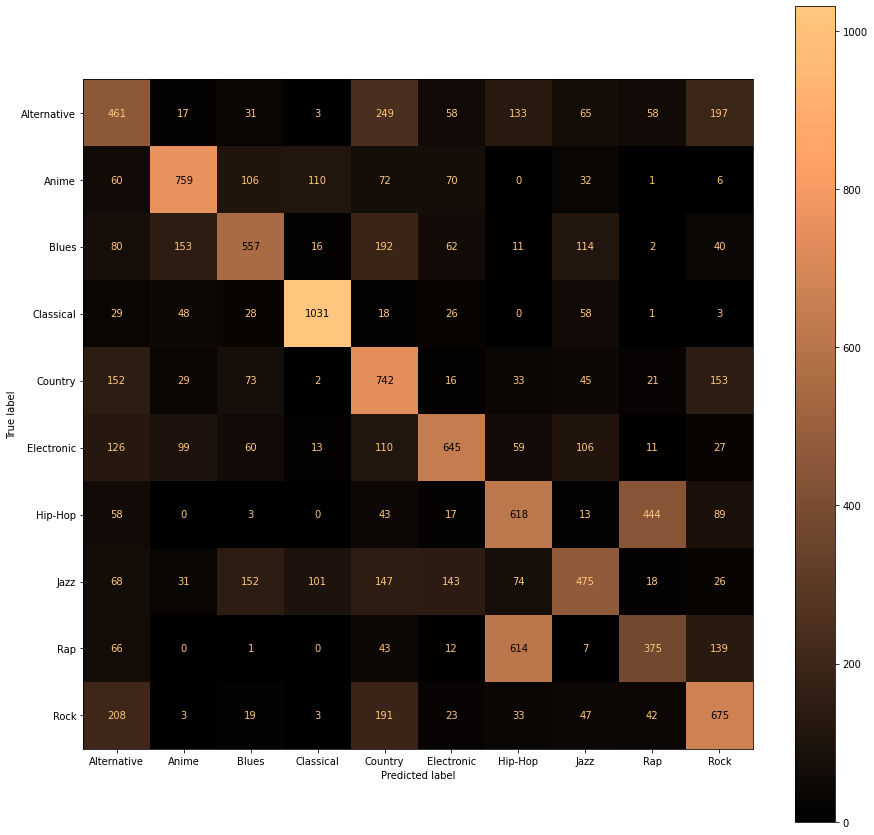

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(data_Y_test, predict, display_labels=le.classes_, ax=ax, cmap='copper')

### Precision, recall и F-мера

In [27]:
classification_report(data_Y_test, predict,
                      target_names=le.classes_, output_dict=True)

{'Alternative': {'precision': 0.35244648318042815,
  'recall': 0.36242138364779874,
  'f1-score': 0.3573643410852714,
  'support': 1272},
 'Anime': {'precision': 0.6663740122914837,
  'recall': 0.6241776315789473,
  'f1-score': 0.6445859872611465,
  'support': 1216},
 'Blues': {'precision': 0.5407766990291262,
  'recall': 0.4539527302363488,
  'f1-score': 0.4935755427558706,
  'support': 1227},
 'Classical': {'precision': 0.8060985144644254,
  'recall': 0.8301127214170693,
  'f1-score': 0.8179293930979771,
  'support': 1242},
 'Country': {'precision': 0.41062534587714444,
  'recall': 0.5860979462875198,
  'f1-score': 0.4829157175398633,
  'support': 1266},
 'Electronic': {'precision': 0.601679104477612,
  'recall': 0.5135350318471338,
  'f1-score': 0.5541237113402063,
  'support': 1256},
 'Hip-Hop': {'precision': 0.3923809523809524,
  'recall': 0.48093385214007783,
  'f1-score': 0.43216783216783217,
  'support': 1285},
 'Jazz': {'precision': 0.49376299376299376,
  'recall': 0.384615384

Для построения ROC кривой необходимо целевой признак сделать бинарным. Для этого выберем один класс и будем обозначать его 1, а остальные будем обозначать 0

In [28]:
def convert_target_to_binary(array:np.ndarray, target:int):
    res = [1 if x==target else 0 for x in array]
    return res

In [29]:
bin_Y_train = convert_target_to_binary(data_Y_train, 3)
bin_Y_test = convert_target_to_binary(data_Y_test, 3)

In [30]:
bin_knn_class = KNeighborsClassifier(n_neighbors=20)

bin_knn_class.fit(data_X_train, bin_Y_train)
predict = bin_knn_class.predict(data_X_test)
bin_knn_class.classes_

array([0, 1])

In [31]:
# предскажем вероятности классов
proba_target = bin_knn_class.predict_proba(data_X_test)
len(proba_target), proba_target

(12500,
 array([[1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        ...,
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.95, 0.05]]))

In [32]:
# вероятность единичного (истинного) класса
true_proba_target1_1 = proba_target[:,1]
true_proba_target1_1

array([0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.05])

In [33]:
fpr, tpr, thresholds = roc_curve(bin_Y_test, true_proba_target1_1,
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.00000000e+00, 3.55302896e-04, 7.99431515e-04, 1.68768875e-03,
        2.93124889e-03, 4.79658909e-03, 6.04014923e-03, 7.99431515e-03,
        9.85965536e-03, 1.23467756e-02, 1.43009416e-02, 1.66104104e-02,
        1.98969622e-02, 2.27393853e-02, 2.72694972e-02, 3.06448748e-02,
        3.52638124e-02, 4.38799076e-02, 5.80920234e-02, 9.69976905e-02,
        2.14602949e-01, 1.00000000e+00]),
 array([0.        , 0.15861514, 0.30193237, 0.42351047, 0.50644122,
        0.57487923, 0.64412238, 0.67713366, 0.7173913 , 0.74798712,
        0.7705314 , 0.7962963 , 0.81078905, 0.83011272, 0.84943639,
        0.86312399, 0.87761675, 0.89049919, 0.90499195, 0.931562  ,
        0.96940419, 1.        ]),
 array([2.  , 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55,
        0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ]))

In [34]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

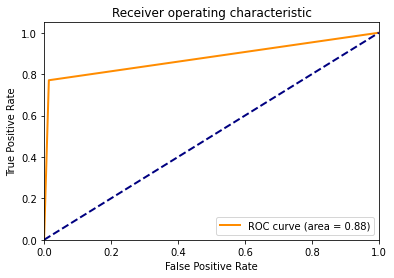

In [35]:
draw_roc_curve(bin_Y_test, predict, pos_label=1, average='micro')

## Обучение с использованием кросс-валидации и подбором гиперпараметров

Применим кросс-валидацию для оценки качества построенной модели. Рассмотрим следующие стратегии кросс-валидации: K-fold, Repeated K-fold и ShuffleSplit. В качестве метрик качетсва используем accuracy и f1-weigthed

In [36]:
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit, cross_validate

scoring = {'acc': 'accuracy',
           'f1': 'f1_weighted'}

In [37]:
%%time
# KFold
scores = cross_validate(KNeighborsClassifier(n_neighbors=20, p=1),
                        data_X, data_y, scoring=scoring,
                        cv=KFold(n_splits=5), return_train_score=True, n_jobs=2)
scores

CPU times: total: 31.2 ms
Wall time: 2min 8s


{'fit_time': array([0.1830399 , 0.1830399 , 0.15703583, 0.21204615, 0.15703487]),
 'score_time': array([11.56236458, 11.2202878 , 12.11843181, 11.13273716,  5.55002451]),
 'test_acc': array([0., 0., 0., 0., 0.]),
 'train_acc': array([0.5999  , 0.66605 , 0.680125, 0.634975, 0.6217  ]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'train_f1': array([0.59984417, 0.6645041 , 0.67807639, 0.63437451, 0.62188308])}

In [38]:
%%time
# RepeatedKFold
scores = cross_validate(KNeighborsClassifier(n_neighbors=20, p=1),
                        data_X, data_y, scoring=scoring,
                        cv=RepeatedKFold(n_splits=5, n_repeats=3), return_train_score=True, n_jobs=2)
scores

CPU times: total: 31.2 ms
Wall time: 5min 1s


{'fit_time': array([0.17203736, 0.17703867, 0.15803504, 0.15103364, 0.16003442,
        0.15403485, 0.16003466, 0.16903806, 0.17003775, 0.15903521,
        0.15503788, 0.14603329, 0.1950438 , 0.16803932, 0.1480329 ]),
 'score_time': array([9.03968883, 8.5435288 , 7.04315019, 9.12471128, 7.60100269,
        8.6392622 , 6.68249989, 9.46312308, 7.36365175, 7.57381177,
        6.45044637, 7.26130509, 9.80920148, 8.26039219, 6.85622287]),
 'test_acc': array([0.532 , 0.5247, 0.5271, 0.5231, 0.5237, 0.5222, 0.5254, 0.5306,
        0.5221, 0.5278, 0.5206, 0.5259, 0.5294, 0.5275, 0.5266]),
 'train_acc': array([0.5867  , 0.5872  , 0.586975, 0.58775 , 0.5894  , 0.587425,
        0.5872  , 0.586875, 0.5868  , 0.58705 , 0.58905 , 0.587275,
        0.587225, 0.5857  , 0.586375]),
 'test_f1': array([0.53093057, 0.52550193, 0.52744213, 0.52226339, 0.52278626,
        0.52132911, 0.52571638, 0.52963365, 0.52090828, 0.5278039 ,
        0.51978386, 0.52483106, 0.52879117, 0.52715638, 0.52630259]),
 'trai

In [39]:
%%time
# ShuffleSplit
scores = cross_validate(KNeighborsClassifier(n_neighbors=20, p=1),
                        data_X, data_y, scoring=scoring,
                        cv=ShuffleSplit(n_splits=5, test_size=0.25), return_train_score=True, n_jobs=2)
scores

CPU times: total: 15.6 ms
Wall time: 2min 17s


{'fit_time': array([0.20204377, 0.19804263, 0.14903235, 0.17603922, 0.14698386]),
 'score_time': array([17.16377568, 17.28242731,  9.79622984,  9.3271246 ,  7.67400694]),
 'test_acc': array([0.518  , 0.52128, 0.52912, 0.52728, 0.52168]),
 'train_acc': array([0.59141333, 0.58741333, 0.58522667, 0.58456   , 0.58664   ]),
 'test_f1': array([0.51723378, 0.52102347, 0.5289264 , 0.5272794 , 0.51939335]),
 'train_f1': array([0.59088942, 0.586935  , 0.58450046, 0.58416891, 0.58630291])}

Применим рандомизированный поиск для подбора оптимального количетсва ближайших соседей

In [40]:
%%time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = [{'n_neighbors': list(range(5, 100, 5)),
           'p': [1, 2]}]
search = RandomizedSearchCV(KNeighborsClassifier(), params, cv=5, scoring='f1_weighted', n_jobs=2)
search.fit(data_X, data_y)

CPU times: total: 297 ms
Wall time: 3min 49s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=2,
                   param_distributions=[{'n_neighbors': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55, 60,
                                                         65, 70, 75, 80, 85, 90,
                                                         95],
                                         'p': [1, 2]}],
                   scoring='f1_weighted')

In [41]:
search.best_score_, search.best_params_

(0.5318752208515142, {'p': 1, 'n_neighbors': 40})

Теперь уточним это значение с помощью обычного GridSearch

In [42]:
%%time

n_range = range(25, 61, 3)
params = [{'n_neighbors': list(n_range),
           'p': [1]}]
search = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='f1_weighted', n_jobs=3)
search.fit(data_X, data_y)

CPU times: total: 328 ms
Wall time: 4min 48s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=3,
             param_grid=[{'n_neighbors': [25, 28, 31, 34, 37, 40, 43, 46, 49,
                                          52, 55, 58],
                          'p': [1]}],
             scoring='f1_weighted')

In [43]:
search.best_score_, search.best_params_

(0.5325740384984671, {'n_neighbors': 49, 'p': 1})

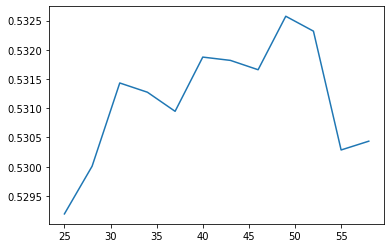

In [44]:
plt.plot(n_range, search.cv_results_['mean_test_score'])

Обучим новую модель с учетом найденного гиперпараметра

In [45]:
search.best_estimator_.fit(data_X_train, data_Y_train)
best_est_predict_train = search.best_estimator_.predict(data_X_train)
best_est_predict_test = search.best_estimator_.predict(data_X_test)

In [46]:
# Accuracy новой модели
accuracy_score(data_Y_train, best_est_predict_train), accuracy_score(data_Y_test, best_est_predict_test)

(0.56352, 0.53064)

Построим кривые обучения и валидации

In [47]:
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [48]:
def plot_validation_curve(estimator, title, X, y,
                          param_name, param_range, cv,
                          scoring='accuracy', n_jobs=1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'D:\\Stud\\6 term\\TMO_BMSTU_22\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

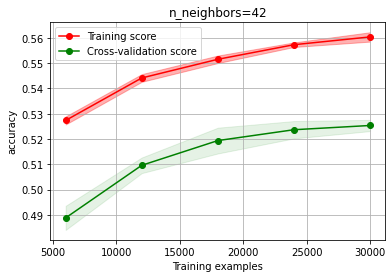

In [49]:
plot_learning_curve(search.best_estimator_, 'n_neighbors=42',
                    data_X_train, data_Y_train, cv=5, train_sizes=np.linspace(.2, 1.0, 5), n_jobs=4)

In [50]:
n_range2 = np.array(range(10, 100, 10))

<module 'matplotlib.pyplot' from 'D:\\Stud\\6 term\\TMO_BMSTU_22\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

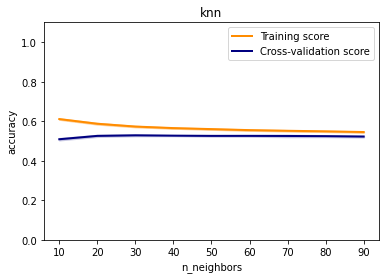

In [51]:
plot_validation_curve(search.best_estimator_, 'knn',
                      data_X_train, data_Y_train,
                      param_name='n_neighbors', param_range=n_range2,
                      cv=5, scoring='accuracy', n_jobs=4)